 # importing libaraies

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
from wordcloud import WordCloud
from scipy import stats

from sklearn.feature_selection import SelectKBest
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

#regression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn .ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRFRegressor

# whats the goals
- Which products are the most sold, and what are their prices?
- Does weight affect sales?
- Does the appearance of the product affect sales?
- What are the sales of each product?
- Is there a relationship between the type of product and the volume of sales?
- Is there a relationship between the fat content and sales? Which fat content is the most sold?
- Does the location of the branch affect sales? Which location has the most sales, and which location has the most branches?
- Does the type of branch affect sales? Which type of branch sells the most?
- Does the year the branch was built affect sales? Which branch sells the most?

In [4]:
train= pd.read_csv(r'C:\Users\Lenovo\Downloads\data projects\supermart\train.csv')
test= pd.read_csv(r'C:\Users\Lenovo\Downloads\data projects\supermart\test.csv')

# understand the data

In [5]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
train.shape

(8523, 12)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### we have 2 columns have missing data 

# data cleaning and EDA

In [104]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [105]:
train.describe(include='O')

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523,8523,8523,8523,6113,8523,8523
unique,1559,5,16,10,3,3,4
top,FDW13,Low Fat,Fruits and Vegetables,OUT027,Medium,Tier 3,Supermarket Type1
freq,10,5089,1232,935,2793,3350,5577


<Axes: >

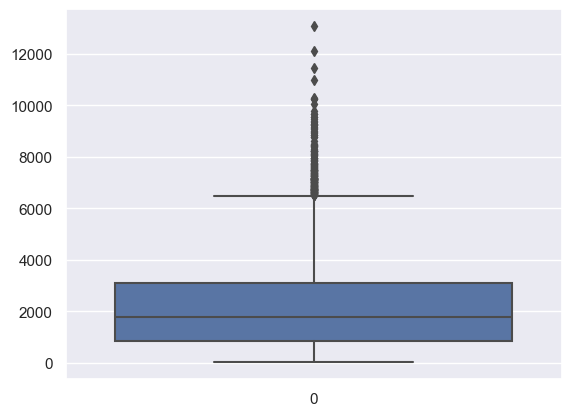

In [159]:
sns.boxplot(train['Item_Outlet_Sales'])

***Item_Outlet_Sales*** has outliars

((array([-3.77092014, -3.54353752, -3.4185981 , ...,  3.4185981 ,
          3.54353752,  3.77092014]),
  array([  33.29  ,   33.29  ,   33.9558, ..., 5954.9152, 5956.9126,
         5960.2416])),
 (1369.5816393496127, 2004.435705223244, 0.9704926124264751))

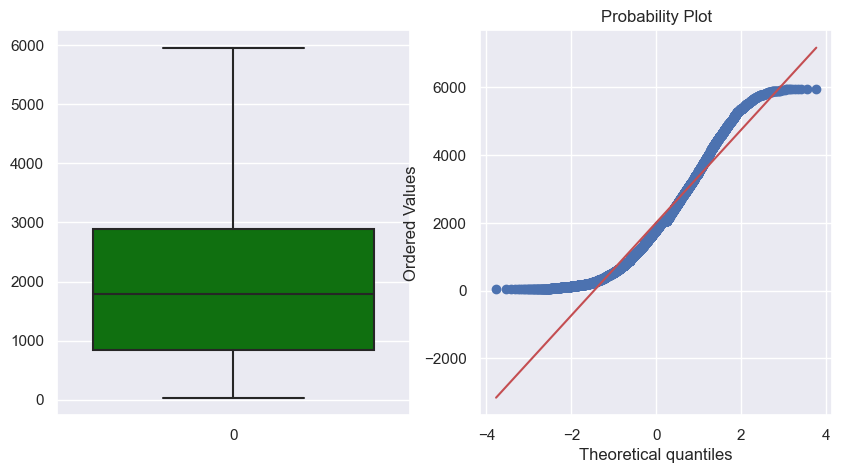

In [205]:
q1, q3 = train['Item_Outlet_Sales'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

train.loc[(train["Item_Outlet_Sales"] < lower_bound) | (train["Item_Outlet_Sales"] > upper_bound), "Item_Outlet_Sales"] = np.nan
train["Item_Outlet_Sales"].fillna(train["Item_Outlet_Sales"].mean(), inplace=True)

sns.set()
fig3=plt.figure(figsize=(10,5))
ax1=fig3.add_subplot(121)
sns.boxplot(train['Item_Outlet_Sales'],orient='v',ax=ax1,color='green')
ax2=fig3.add_subplot(122)
stats.probplot(train['Item_Outlet_Sales'],plot=ax2)

In [108]:
train['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

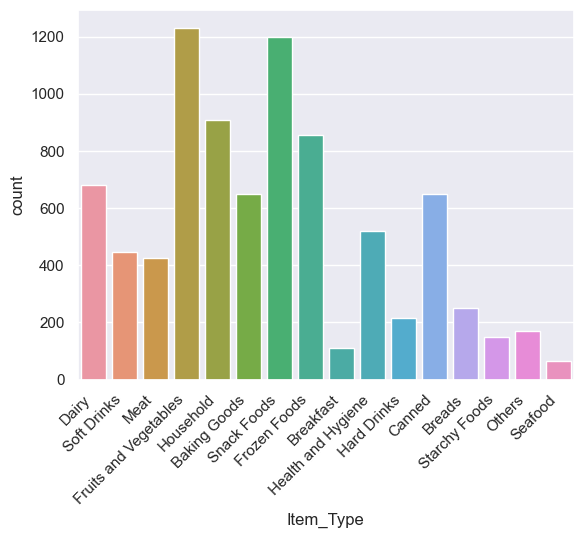

In [109]:
sns.countplot(x='Item_Type',data=train)
plt.xticks(rotation=45,ha='right');

In [110]:
train[['Item_Type','Item_Outlet_Sales']].groupby(['Item_Type'],as_index=True).mean().sort_values(by='Item_Outlet_Sales',ascending=False)

,Item_Outlet_Sales
Item_Type,
Seafood,2256.625748
Starchy Foods,2231.564834
Snack Foods,2150.475055
Household,2137.145058
Fruits and Vegetables,2134.491653
Canned,2125.975093
Breads,2078.904508
Dairy,2044.472031
Meat,2043.165662


- As you can see, ***fruits and vegetables*** are the top-selling products, followed by ***snack foods***.
- The most expensive products are ***seafood***.

In [111]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [206]:
train['Item_Weight'].fillna(train['Item_Weight'].median(), inplace=True)

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



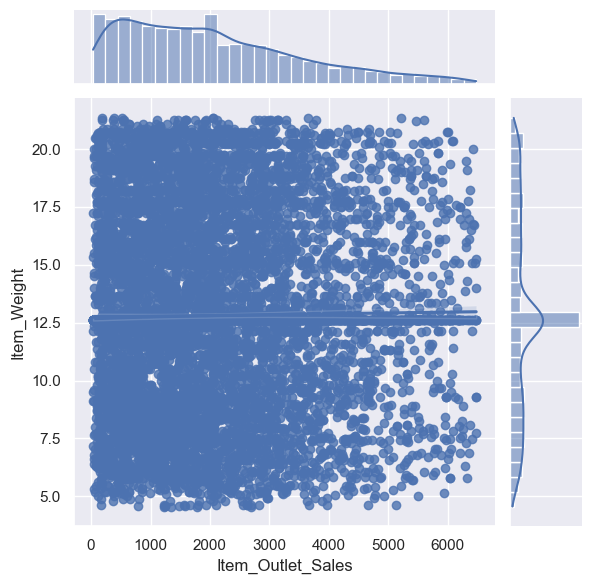

In [113]:
sns.jointplot(x='Item_Outlet_Sales',y='Item_Weight',kind='reg',data=train)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11880\3307980215.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



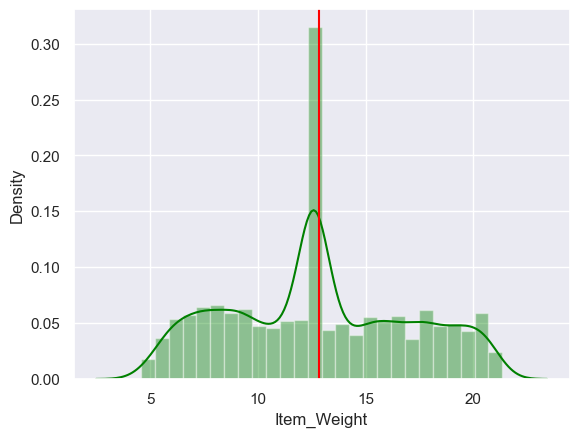

In [207]:
sns.distplot(train['Item_Weight'].dropna(),color='green')
plt.axvline(train['Item_Weight'].dropna().mean(),color='red')

<Axes: xlabel='Item_Outlet_Sales', ylabel='Item_Weight'>

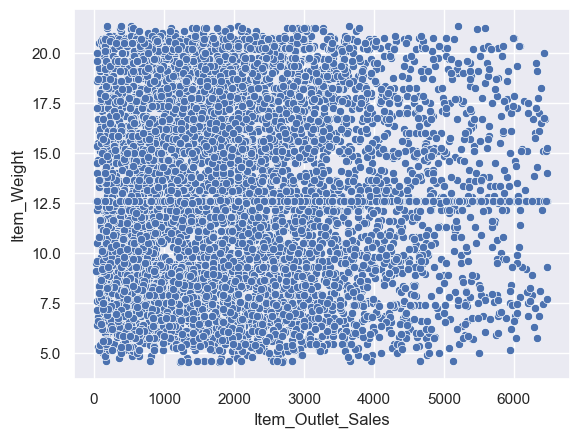

In [115]:
sns.scatterplot(x='Item_Outlet_Sales',y='Item_Weight',data=train)

The weight of the product does not affect sales, and there is no correlation between the two.

In [116]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<Axes: >

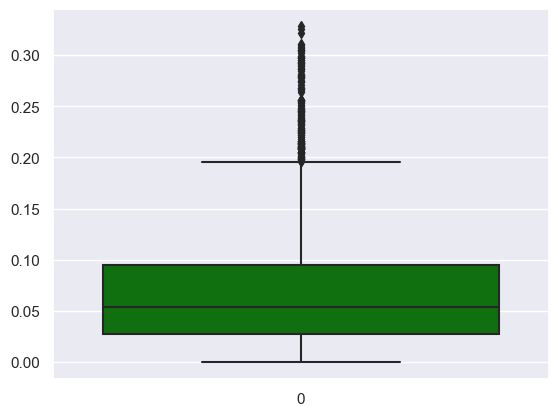

In [117]:
sns.boxplot(train['Item_Visibility'],orient='v',color='green')

we have a lot outlier

((array([-3.77092014, -3.54353752, -3.4185981 , ...,  3.4185981 ,
          3.54353752,  3.77092014]),
  array([0.        , 0.        , 0.        , ..., 0.18394847, 0.18403525,
         0.18404155])),
 (0.04328694732775154, 0.06223583985524214, 0.9703906030986351))

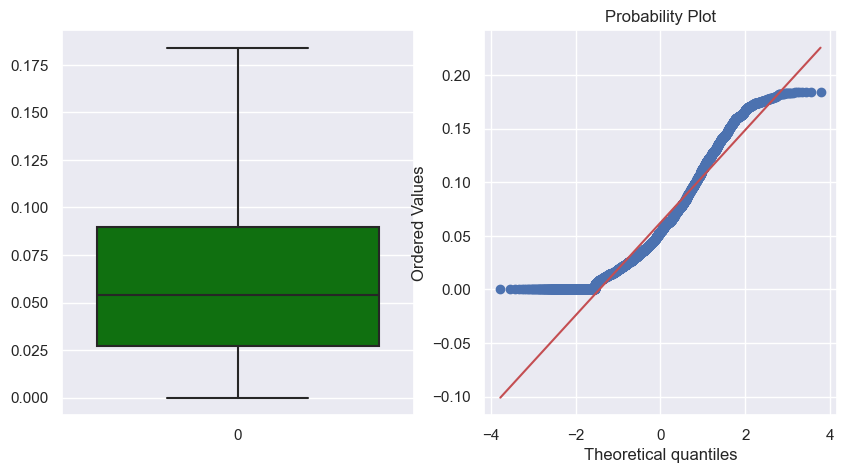

In [214]:
q1, q3 = train['Item_Visibility'].quantile([0.25, 0.75])
iqr = q3 - q1
lower_bound = q1 - (1.5 * iqr)
upper_bound = q3 + (1.5 * iqr)

train.loc[(train["Item_Visibility"] < lower_bound) | (train["Item_Visibility"] > upper_bound), "Item_Visibility"] = np.nan
train["Item_Visibility"].fillna(train["Item_Visibility"].mean(), inplace=True)

sns.set()
fig3=plt.figure(figsize=(10,5))
ax1=fig3.add_subplot(121)
sns.boxplot(train['Item_Visibility'],orient='v',ax=ax1,color='green')
ax2=fig3.add_subplot(122)
stats.probplot(train['Item_Visibility'],plot=ax2)

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



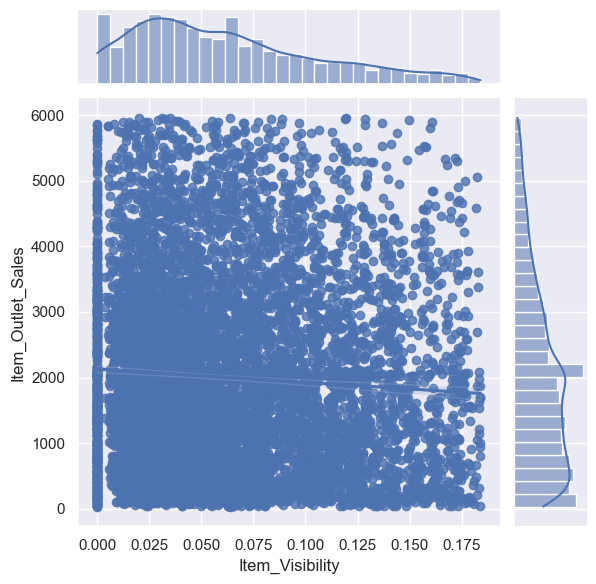

In [184]:
sns.jointplot(x='Item_Visibility',y='Item_Outlet_Sales',data=train,kind='reg')

In [215]:
stats.pearsonr(train['Item_Outlet_Sales'],train['Item_Visibility'])

PearsonRResult(statistic=-0.06387392830873101, pvalue=3.5910079279763035e-09)

The ***Item_Visibility*** of the product does not affect in ***Item_Outlet_Sales***, and there is no correlation between the two.

In [121]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [122]:
train['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

we have We have duplicate rows  in ***Item_fat***

In [216]:
mapping = {'LF': 'Low Fat', 'low fat': 'Low Fat', 'reg': 'Regular'}
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(mapping)
print(train['Item_Fat_Content'].unique())

['Low Fat' 'Regular']


In [124]:
remote_type = ['Low Fat', 'regular']

fig = px.bar(x = remote_type, y = train['Item_Fat_Content'].value_counts(),color = remote_type, text = train['Item_Fat_Content'].value_counts())

fig.update_layout( xaxis_title = "Item_Fat_Content", yaxis_title = "count")
fig.show()

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Outlet_Sales'>

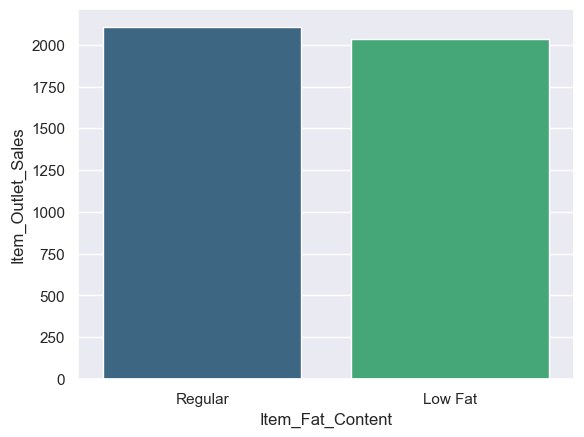

In [125]:
data=train[['Item_Fat_Content','Item_Outlet_Sales']].groupby(['Item_Fat_Content'],as_index=True).mean().sort_values(by='Item_Outlet_Sales',ascending=False)
sns.barplot(x=data.index, y='Item_Outlet_Sales', data=data, palette='viridis')


I think ***Item_Fat_Content*** close in ***Item_Outlet_Sales*** colum

In [126]:
train['Outlet_Establishment_Year'].value_counts()

Outlet_Establishment_Year
1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: count, dtype: int64

Outlet_Location_Type

In [127]:
type = train['Outlet_Type'].value_counts()
fig = px.pie(values = type.values, names = type.index, title = 'Outlet_Type')
fig.show()

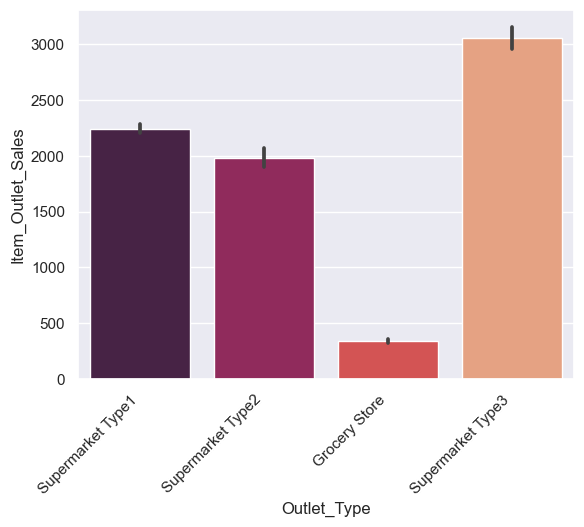

In [128]:
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=train,palette='rocket')
plt.xticks(rotation=45, ha='right');

In [129]:
type = train['Outlet_Location_Type'].value_counts()
fig = px.pie(values = type.values, names = type.index, title = 'Outlet_Location_Type distribution')
fig.show()

<Axes: xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

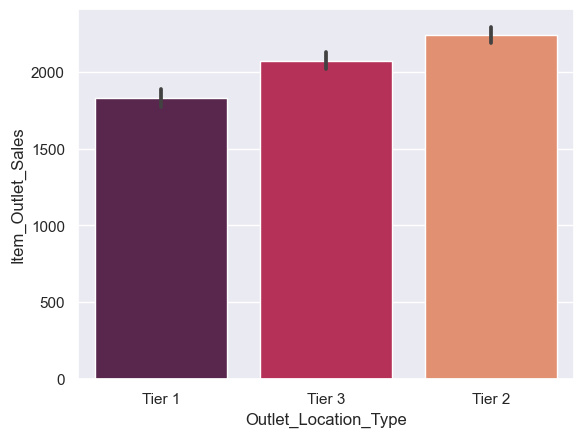

In [130]:
sns.barplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=train,palette='rocket')

outlet size

<Axes: xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

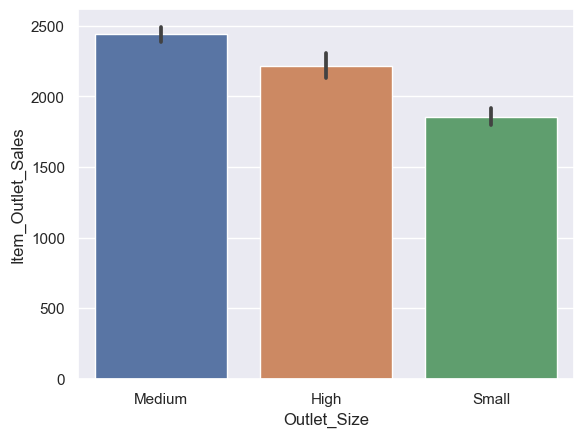

In [131]:
sns.barplot(x='Outlet_Size',y='Item_Outlet_Sales',data=train)

<Axes: xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

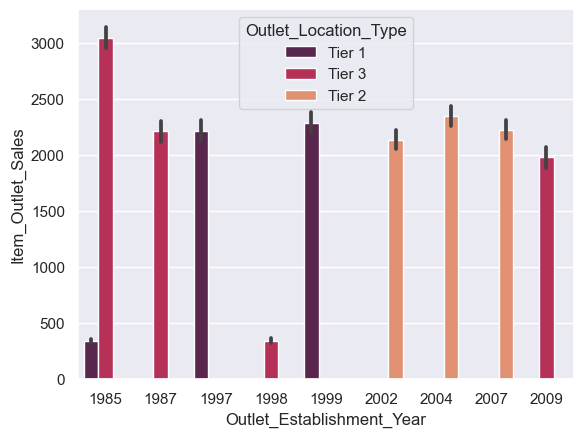

In [132]:
sns.barplot(x='Outlet_Establishment_Year',y='Item_Outlet_Sales',hue='Outlet_Location_Type',data=train,palette='rocket')


# data warniling

In [133]:
train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [217]:
train.drop(columns=['Item_Weight','Item_Identifier','Outlet_Identifier','Outlet_Size'],axis=1,inplace=True)

In [218]:
train['Item_Fat_Content'].replace('Low Fat',1,inplace=True)
train['Item_Fat_Content'].replace('Regular',0,inplace=True)

In [219]:
train['Outlet_Location_Type'].replace('Tier 1',1,inplace=True)
train['Outlet_Location_Type'].replace('Tier 2',2,inplace=True)
train['Outlet_Location_Type'].replace('Tier 3',3,inplace=True)

In [220]:
df_dummies=pd.get_dummies(train['Outlet_Type'])
train = train.merge(df_dummies, left_index=True, right_index=True)
train[df_dummies.columns] = train[df_dummies.columns].astype(int)

In [221]:
train.head(4)

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,1,0.016047,Dairy,249.8092,1999,1,Supermarket Type1,3735.1380,0,1,0,0
1,0,0.019278,Soft Drinks,48.2692,2009,3,Supermarket Type2,443.4228,0,0,1,0
2,1,0.016760,Meat,141.6180,1999,1,Supermarket Type1,2097.2700,0,1,0,0
3,0,0.000000,Fruits and Vegetables,182.0950,1998,3,Grocery Store,732.3800,1,0,0,0


In [222]:
train.drop('Outlet_Type',axis=1,inplace=True)

In [223]:
df_dummies=pd.get_dummies(train['Item_Type'])
train = train.merge(df_dummies, left_index=True, right_index=True)
train[df_dummies.columns] = train[df_dummies.columns].astype(int)

In [224]:
train.drop('Item_Type',axis=1,inplace=True)

In [225]:
train.head(5)

,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Location_Type,Item_Outlet_Sales,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3,...,Fruits and Vegetables,Hard Drinks,Health and Hygiene,Household,Meat,Others,Seafood,Snack Foods,Soft Drinks,Starchy Foods
0,1,0.016047,249.8092,1999,1,3735.1380,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.019278,48.2692,2009,3,443.4228,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1,0.016760,141.6180,1999,1,2097.2700,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0.000000,182.0950,1998,3,732.3800,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0.000000,53.8614,1987,3,994.7052,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [226]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Fat_Content           8523 non-null   int64  
 1   Item_Visibility            8523 non-null   float64
 2   Item_MRP                   8523 non-null   float64
 3   Outlet_Establishment_Year  8523 non-null   int64  
 4   Outlet_Location_Type       8523 non-null   int64  
 5   Item_Outlet_Sales          8523 non-null   float64
 6   Grocery Store              8523 non-null   int32  
 7   Supermarket Type1          8523 non-null   int32  
 8   Supermarket Type2          8523 non-null   int32  
 9   Supermarket Type3          8523 non-null   int32  
 10  Baking Goods               8523 non-null   int32  
 11  Breads                     8523 non-null   int32  
 12  Breakfast                  8523 non-null   int32  
 13  Canned                     8523 non-null   int32

### data ready to modelssss

In [227]:
X=train.drop('Item_Outlet_Sales',axis=1)
y=train['Item_Outlet_Sales']

In [228]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2024,shuffle=True)

In [229]:
model=LinearRegression().fit(X_train,y_train)
y_pred=model.predict(X_test)
cost=mean_absolute_error(y_pred,y_test)
print(cost)
cost2=mean_absolute_percentage_error(y_pred,y_test)
cost2

766.4918456922921


1.4044857664212358

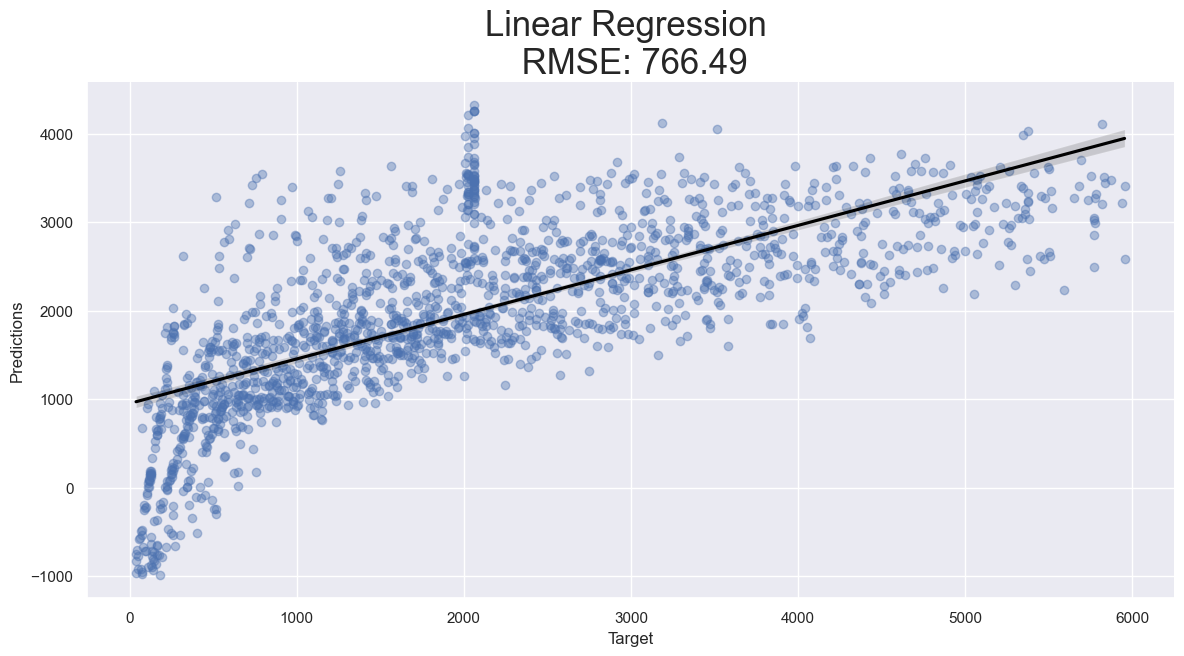

In [230]:
reg_lin_df = pd.DataFrame({'Target': y_test, 'Predictions': y_pred})

sns.lmplot(x='Target', y='Predictions', data=reg_lin_df, height=6, aspect=2, line_kws={'color': 'black'}, scatter_kws={'alpha': 0.4})

plt.title('Linear Regression \n RMSE: {0:.2f}'.format(cost), size=25)

plt.show()

In [231]:
model=XGBRFRegressor(n_estimators = 160,learning_rate=0.1,max_depth=5).fit(X_train,y_train)
y_pred=model.predict(X_test)
cost=mean_absolute_error(y_pred,y_test)
cost

1090.4919613370696

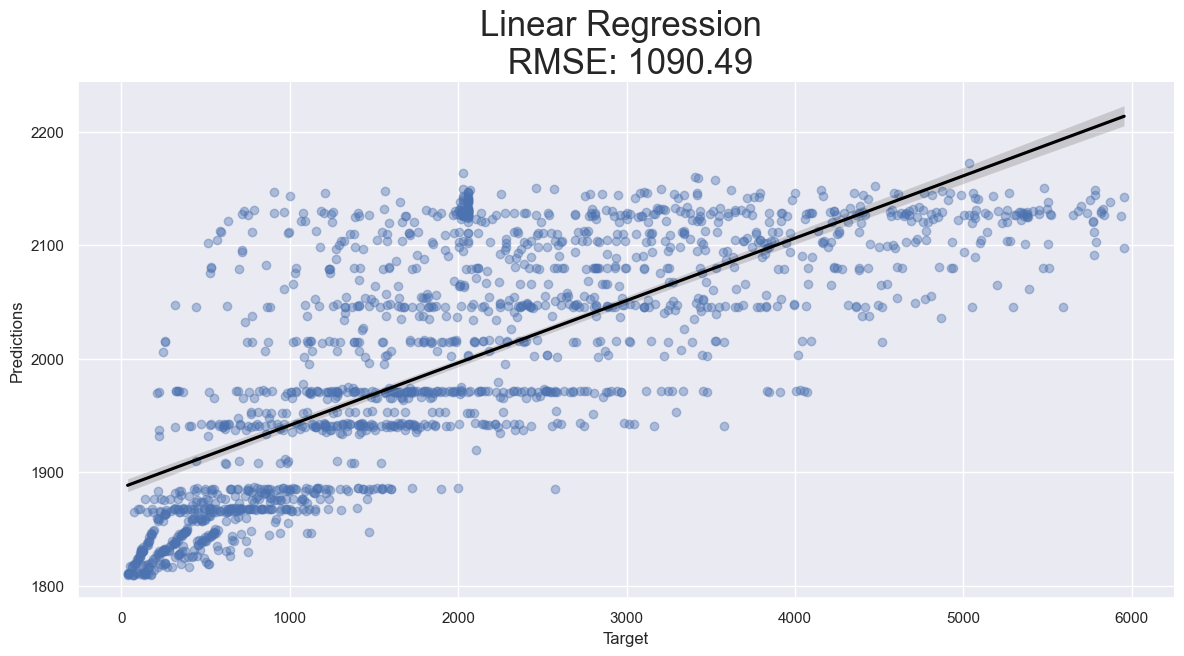

In [232]:
reg_lin_df = pd.DataFrame({'Target': y_test, 'Predictions': y_pred})

sns.lmplot(x='Target', y='Predictions', data=reg_lin_df, height=6, aspect=2, line_kws={'color': 'black'}, scatter_kws={'alpha': 0.4})

plt.title('Linear Regression \n RMSE: {0:.2f}'.format(cost), size=25)

plt.show()

In [233]:
model=SVR(kernel='rbf',degree=3,max_iter=2000).fit(X_train,y_train)
y_pred=model.predict(X_test)
cost=mean_absolute_error(y_pred,y_test)
cost2=mean_absolute_percentage_error(y_pred,y_test)
print(cost)
cost2

C:\Users\Lenovo\AppData\Roaming\Python\Python311\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning:

Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.



1184.71688188203


0.8584807075886558

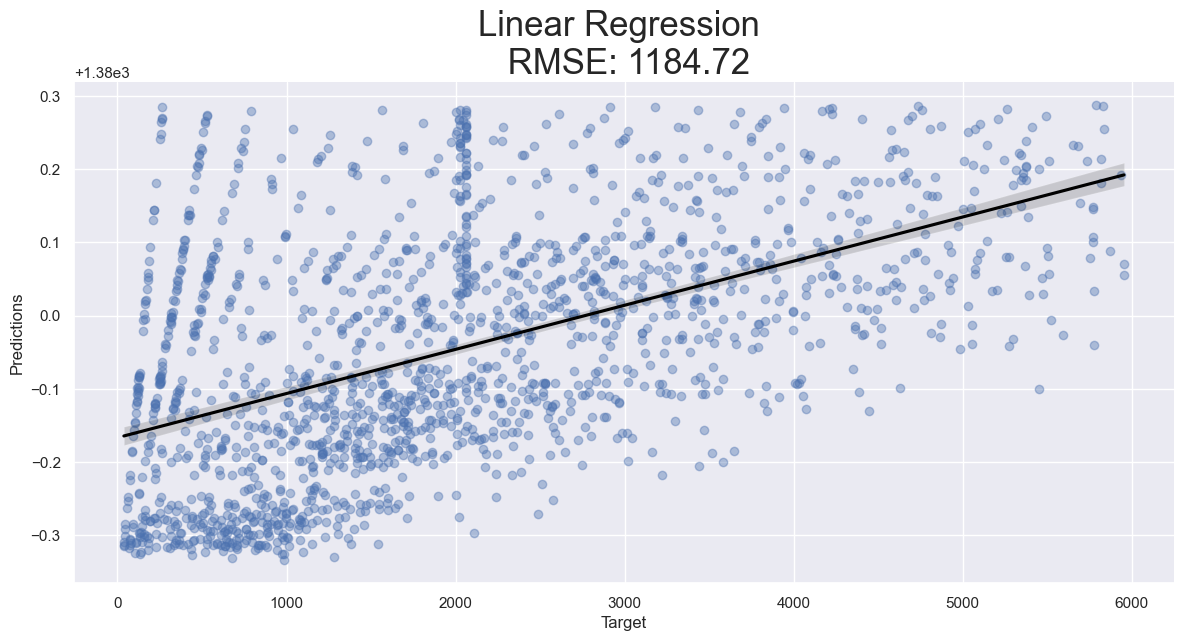

In [234]:
reg_lin_df = pd.DataFrame({'Target': y_test, 'Predictions': y_pred})

sns.lmplot(x='Target', y='Predictions', data=reg_lin_df, height=6, aspect=2, line_kws={'color': 'black'}, scatter_kws={'alpha': 0.4})

plt.title('Linear Regression \n RMSE: {0:.2f}'.format(cost), size=25)

plt.show()

In [235]:
model=RandomForestRegressor(n_estimators=300,max_depth=25).fit(X_train,y_train)
y_pred=model.predict(X_test)
cost=mean_absolute_error(y_pred,y_test)
print(cost)
cost2=mean_absolute_percentage_error(y_pred,y_test)
cost2

728.0073774896499


0.39153679467887476

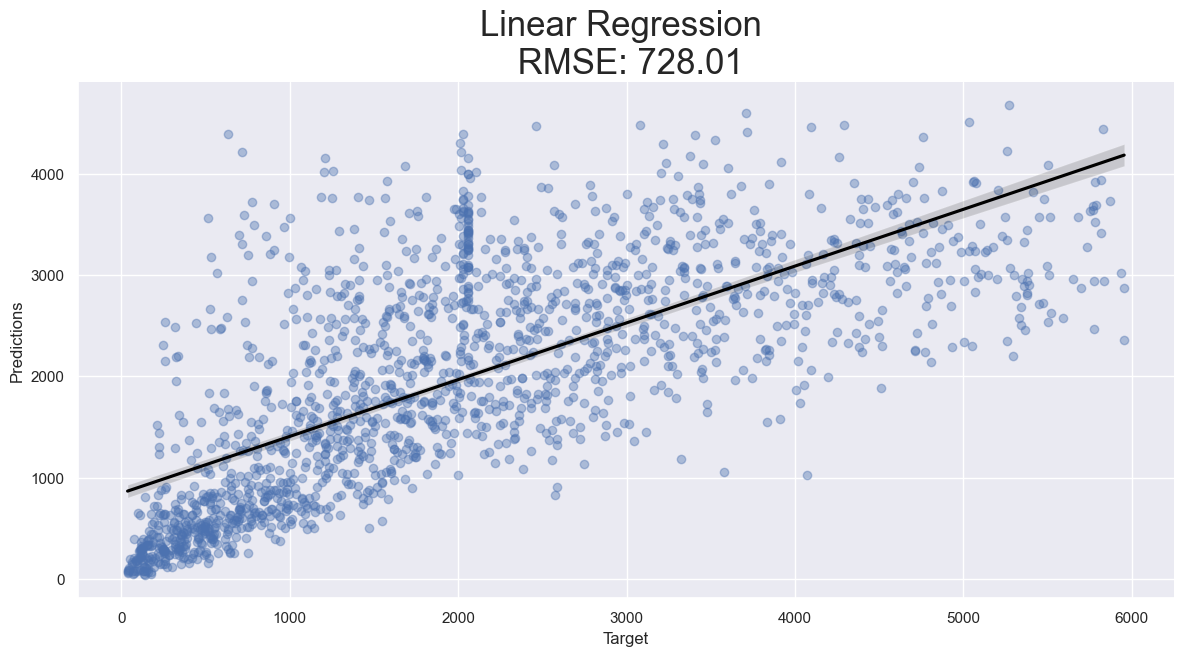

In [236]:
reg_lin_df = pd.DataFrame({'Target': y_test, 'Predictions': y_pred})

sns.lmplot(x='Target', y='Predictions', data=reg_lin_df, height=6, aspect=2, line_kws={'color': 'black'}, scatter_kws={'alpha': 0.4})
plt.title('Linear Regression \n RMSE: {0:.2f}'.format(cost), size=25)
plt.show()

In [ ]:
model=GradientBoostingRegressor(loss='absolute_error',max_depth=3000,learning_rate=0.001).fit(X_train,y_train)
y_pred=model.predict(X_test)
cost=mean_absolute_error(y_pred,y_test)
print(cost)
cost=mean_absolute_percentage_error(y_pred,y_test)
cost

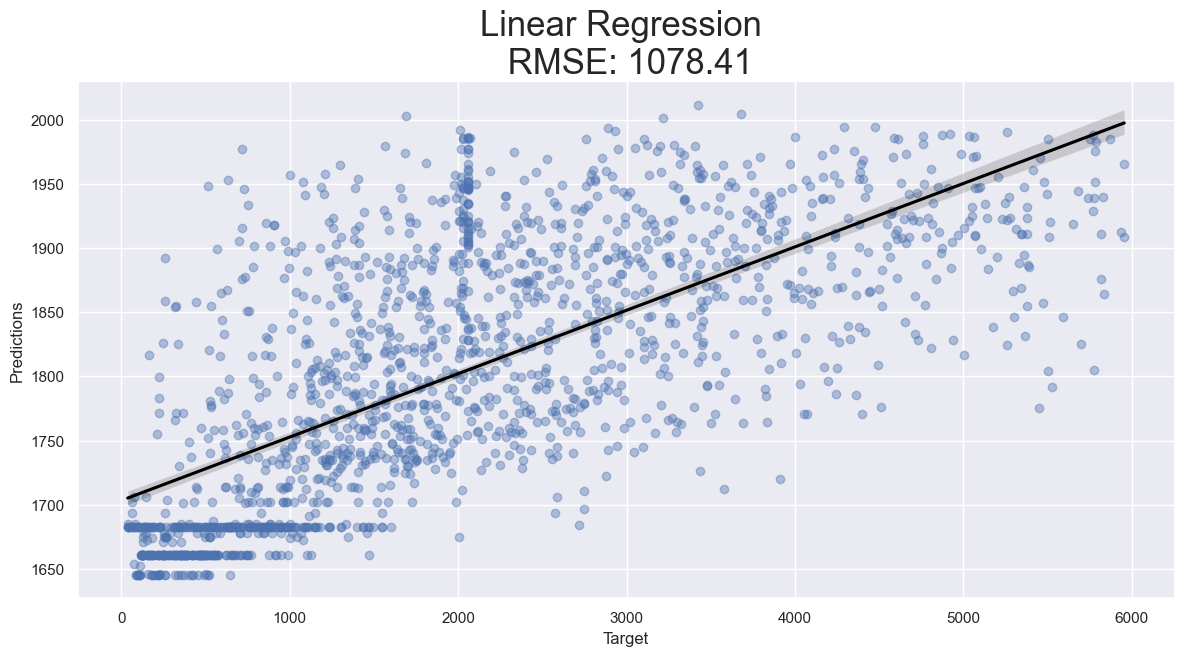

In [ ]:
reg_lin_df = pd.DataFrame({'Target': y_test, 'Predictions': y_pred})

sns.lmplot(x='Target', y='Predictions', data=reg_lin_df, height=6, aspect=2, line_kws={'color': 'black'}, scatter_kws={'alpha': 0.4})
plt.title('Linear Regression \n RMSE: {0:.2f}'.format(cost), size=25)
plt.show()